### This notebook demonstrates reading video frames stored in Tensorflow `tfrecord` format.

### The video frames are the result of calculating optical flow between two adjacent RGB video frames.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

2022-10-12 22:17:12.913416: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-12 22:17:16.673633: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-12 22:17:16.673665: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-12 22:17:16.911306: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-12 22:17:23.275357: W tensorflow/stream_executor/platform/de

In [8]:
tf_record_file = 'inputs/batch_1_of_2.tfrecords'

raw_video_dataset = tf.data.TFRecordDataset(tf_record_file)

In [9]:
height = 720
width = 1280
num_depth = 4
n_videos_per_record = 1

n_frames = 354

In [10]:
def _parse_video_function(example_proto):
    image_seq = []
    global n_frames

    #Use sample frames for demostration.

    for image_count in range(n_frames):
        path = 'blob' + '/' + str(image_count)

        feature_dict = {path : tf.io.FixedLenFeature([], tf.string, default_value = ''),
                        'height': tf.io.FixedLenFeature([], tf.int64 ,default_value=0),
                        'width': tf.io.FixedLenFeature([], tf.int64 ,default_value=0),
                        'depth': tf.io.FixedLenFeature([], tf.int64 ,default_value=0)}

        features = tf.io.parse_single_example(example_proto, 
                                              features = feature_dict)

        image_buffer = tf.reshape(features[path], shape = [])
        
        image = tf.io.decode_raw(image_buffer, tf.uint8)
        image = tf.reshape(image, tf.stack([height, width, num_depth]))
        image = tf.reshape(image, [1, height, width, num_depth])
        image_seq.append(image)

    image_seq = tf.concat(image_seq, 0)
    
    return image_seq

In [11]:
parsed_video_dataset = raw_video_dataset.map(_parse_video_function)

In [12]:
parsed_video_dataset.element_spec

TensorSpec(shape=(354, 720, 1280, 4), dtype=tf.uint8, name=None)

In [13]:
#Recover images from the tfrecord file.
plt.figure(figsize = (16, 16))

for image_features in parsed_video_dataset.take(1):
    image_raw = image_features.numpy() / 255.0

    #Display subplots.
    for item in range(4):
        plt.subplot(2, 2, item + 1)
        plt.imshow(image_raw[item, :, :, ])
    plt.show()

2022-10-12 22:27:00.915633: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: blob/11 (data type: string) is required but could not be found.
2022-10-12 22:27:00.915719: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: blob/12 (data type: string) is required but could not be found.
2022-10-12 22:27:00.915772: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: blob/18 (data type: string) is required but could not be found.
2022-10-12 22:27:00.915811: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARGUMENT: Feature: blob/16 (data type: string) is required but could not be found.
2022-10-12 22:27:00.915880: W tensorflow/core/framework/op_kernel.cc:1780] OP_REQUIRES failed at example_parsing_ops.cc:94 : INVALID_ARG

InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_1_device_/job:localhost/replica:0/task:0/device:CPU:0}} Feature: blob/11 (data type: string) is required but could not be found.
	 [[{{node ParseSingleExample_11/ParseExample/ParseExampleV2}}]] [Op:IteratorGetNext]

<Figure size 1152x1152 with 0 Axes>

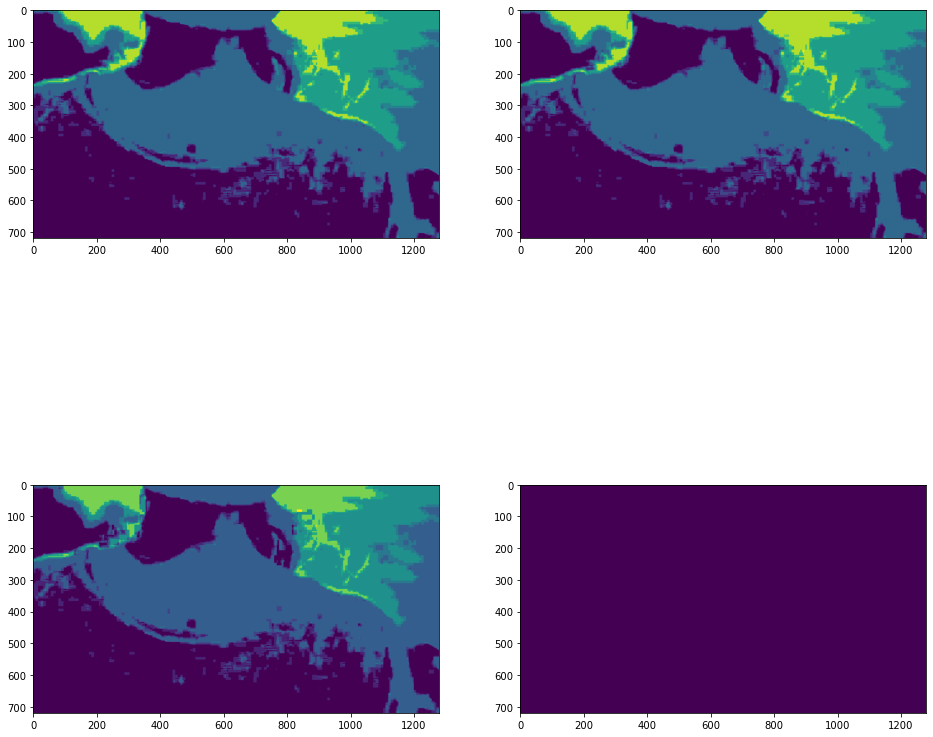

In [8]:
#Recover images from the tfrecord file.
plt.figure(figsize = (16, 16))

for image_features in parsed_video_dataset.unbatch().take(1):
    image_raw = image_features.numpy()

    #Display subplots.
    for item in range(4):
        plt.subplot(2, 2, item + 1)
        plt.imshow(image_raw[:, :, item])
    plt.show()